### Work on Opening and Viewing Data

In [156]:
# import libs
import numpy as np
import matplotlib.pyplot as plt
import scipy.io 

In [23]:
# open mat files
data401 = scipy.io.loadmat("T1rho_S401.mat")
data1401 = scipy.io.loadmat("T1rho_S1401.mat")

# open mat files for masks
mask_data401 = scipy.io.loadmat("T1rho_S401_prois.mat")
mask_data1401 = scipy.io.loadmat("T1rho_S1401_prois.mat")

#### Load Unmasked Data
1) Pull Data from Mat file
2) Look at one spinlock time
3) Show any given slice in image

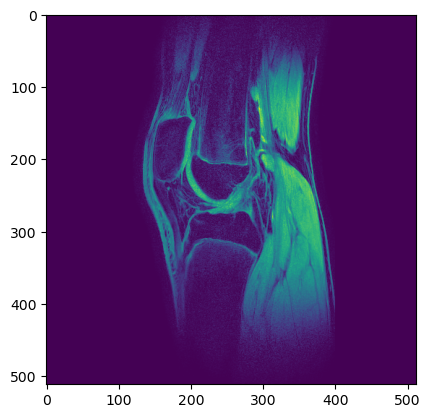

In [93]:
# load image volume data
v401 = data401["v"]

# only look at image volume spinlock at 0ms
v401 = np.squeeze(v401[:,:,:,0])

# show one image
plt.imshow(v401[:,:,30])

#### Load Mask Data
1) Pull Data from Mat file
2) Look at one spinlock time
3) Show matching mask for slice in image

(512, 512, 47)


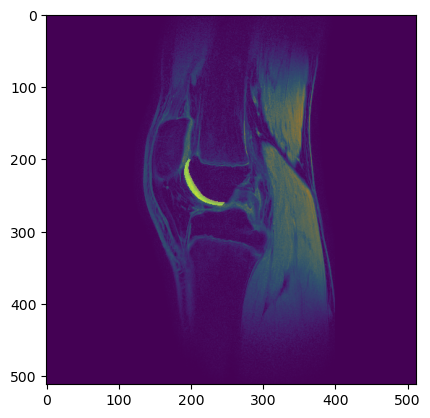

In [155]:
# load list of slices where masks are
fem_slices_401 = np.squeeze(mask_data401["rslf"])
tib_slices_401 = np.squeeze(mask_data401["rslt"])
rsl_slices_401 = np.squeeze(mask_data401["rsl"])


#load masks
fem_401 = mask_data401["maskf"]
tib_401 = mask_data401["maskt"]

# combine deep and superficial cartilage into one
fem_combined_401 = np.squeeze(fem_401[:,0,:]|fem_401[:,1,:])
tib_combined_401 = np.squeeze(tib_401[:,0,:]|tib_401[:,1,:])

#reshape into image
mask = fem_combined_401[:,:].reshape(512,512,fem_combined_401.shape[-1])
print(mask.shape)

# show one image
plt.figure()
i = 26
plt.imshow(v401[:,:,8+i])
plt.imshow(mask[:,:,i].T, alpha=0.5)


#### Create a Function to Load and orient the masks

In [143]:
def load_MRI_and_masks(Patient_ID):
    """
    For each subject's MRI scans, open and load the mat file holding 
    the MRI scan and the mat file holding the masks. It then will combine 
    the cartilage masks for the 2 types of cartilage, superficial or deep.

    Parameters:
    -----------
    Patient_ID: INT
    Integer corresponding to the specific file to open

    Returns:
    -----------
    volume: 3D ARRAY of FLOAT (512,512,64)
    Series of 64 slices from MRI scanning, each slice is 512 x 512 pixels

    fem_masks: 3D ARRAY of BOOL (512,512, number of slices with femoral cartilage)
    Series of slices of masking, with 512x512 images. Each image pixel is 
    boolean corresponding to if the pixel on the volume value is femoral 
    cartilage

    tib_masks: 3D ARRAY of BOOL (512,512, number of slices with tibial cartilage)
    Series of slices of masking, with 512x512 images. Each image pixel is 
    boolean corresponding to if the pixel on the volume value is tibial 
    cartilage

    fem_slices: 1D ARRAY of INTS (number of slices with femoral cartilage, )
    Set of values matching the slice (:,:, #) of the volume array to the 
    slice (:,:, #) of the masks. The value of an index is the slice of the 
    volume variable, whereas the index is the slice of the mask, Consistent 
    for all _slices variables.

    tib_slices: 1D ARRAY of INTS (number of slices with tibial cartilage, )
    Set of values matching the slice (:,:, #) of the volume array to the 
    slice (:,:, #) of the masks. The value of an index is the slice of the 
    volume variable, whereas the index is the slice of the mask, Consistent 
    for all _slices variables.

    rsl_slices: 1D ARRAY of INTS (number of slices with tibial or femoral cartilage, )
    Set of values matching the slice (:,:, #) of the volume array to the 
    slice (:,:, #) of the masks. The value of an index is the slice of the 
    volume variable, whereas the index is the slice of the mask, Consistent 
    for all _slices variables.
        
    """
    # create file names
    volume_data_file = "T1rho_S"+ str(Patient_ID)+ ".mat"
    mask_data_file = "T1rho_S"+ str(Patient_ID)+ "_prois.mat"

    # load data
    volume_data = scipy.io.loadmat(volume_data_file)
    mask_data = scipy.io.loadmat(mask_data_file)

    # choose spinlock 0ms for volume
    volume = np.squeeze(volume_data['v'][:,:,:, 0])

    # load slices of masks
    fem_slices = np.squeeze(mask_data["rslf"])
    tib_slices = np.squeeze(mask_data["rslt"])
    rsl_slices = np.squeeze(mask_data["rsl"])

    # load masks
    fem_masks = mask_data["maskf"]
    tib_masks = mask_data["maskt"]

    # combine deep and superficial cartilage into one
    fem_masks = np.squeeze(fem_masks[:,0,:]|fem_masks[:,1,:])
    tib_masks = np.squeeze(tib_masks[:,0,:]|tib_masks[:,1,:])
    
    #reformat masks into 512x512 array
    fem_masks = fem_masks[:,:].reshape(512,512,fem_masks.shape[-1])
    tib_masks = tib_masks[:,:].reshape(512,512,tib_masks.shape[-1])

    # transpose each slice in the masks
    fem_masks = np.swapaxes(fem_masks, 0,1)
    tib_masks = np.swapaxes(tib_masks, 0,1)

    return volume, fem_masks, tib_masks, fem_slices, tib_slices, rsl_slices

In [146]:
v401, fem401, tib401, fem_slices_401, tib_slices_401, rsl_slices_401 = load_MRI_and_masks(401)



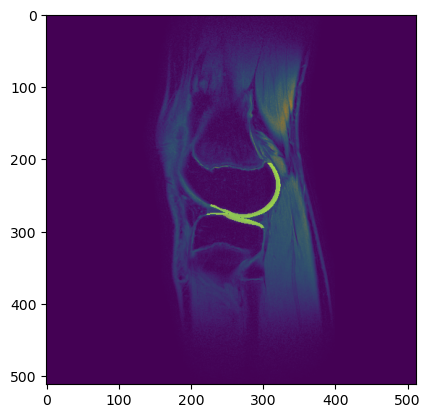

In [154]:
plt.figure()
i = 6
plt.imshow(v401[:,:,8+i])
plt.imshow(fem401[:,:,i]|tib401[:,:,i], alpha=.5)